<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/10.%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%2C%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [ ]:
API_KEY = "Ваш_API_ключ"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [ ]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "Ваш_API_ключ"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [ ]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-04-25 12:00:00,11.02,44,few clouds
1,Paris,FR,48.858890,2.320041,2024-04-25 15:00:00,12.59,40,broken clouds
2,Paris,FR,48.858890,2.320041,2024-04-25 18:00:00,11.40,56,light rain
3,Paris,FR,48.858890,2.320041,2024-04-25 21:00:00,10.19,72,light rain
4,Paris,FR,48.858890,2.320041,2024-04-26 00:00:00,8.07,82,broken clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-04-29 21:00:00,10.01,78,few clouds
116,Moscow,RU,55.750446,37.617494,2024-04-30 00:00:00,7.73,79,clear sky
117,Moscow,RU,55.750446,37.617494,2024-04-30 03:00:00,6.20,75,clear sky
118,Moscow,RU,55.750446,37.617494,2024-04-30 06:00:00,8.93,55,clear sky


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [ ]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [ ]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "Ваш_API_ключ"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

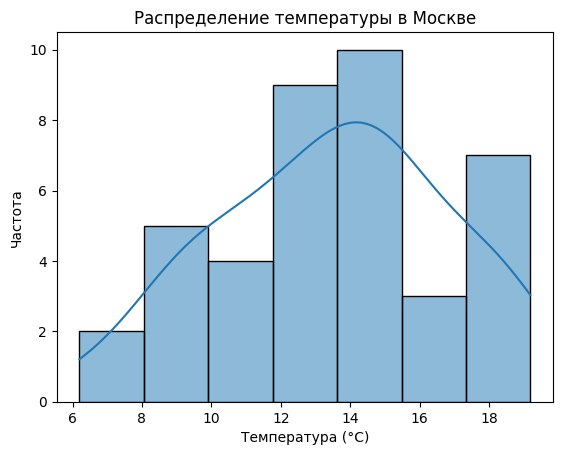

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

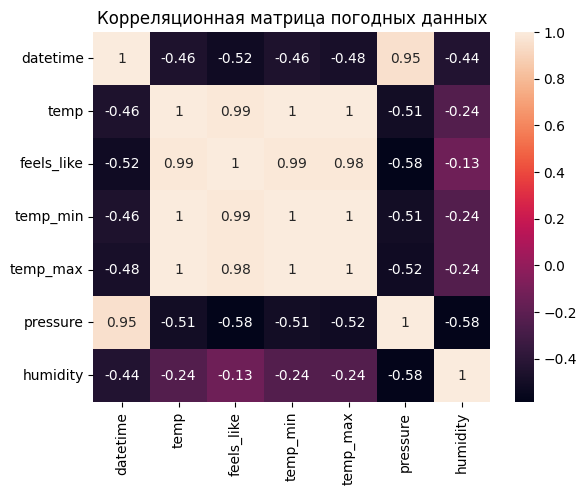

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

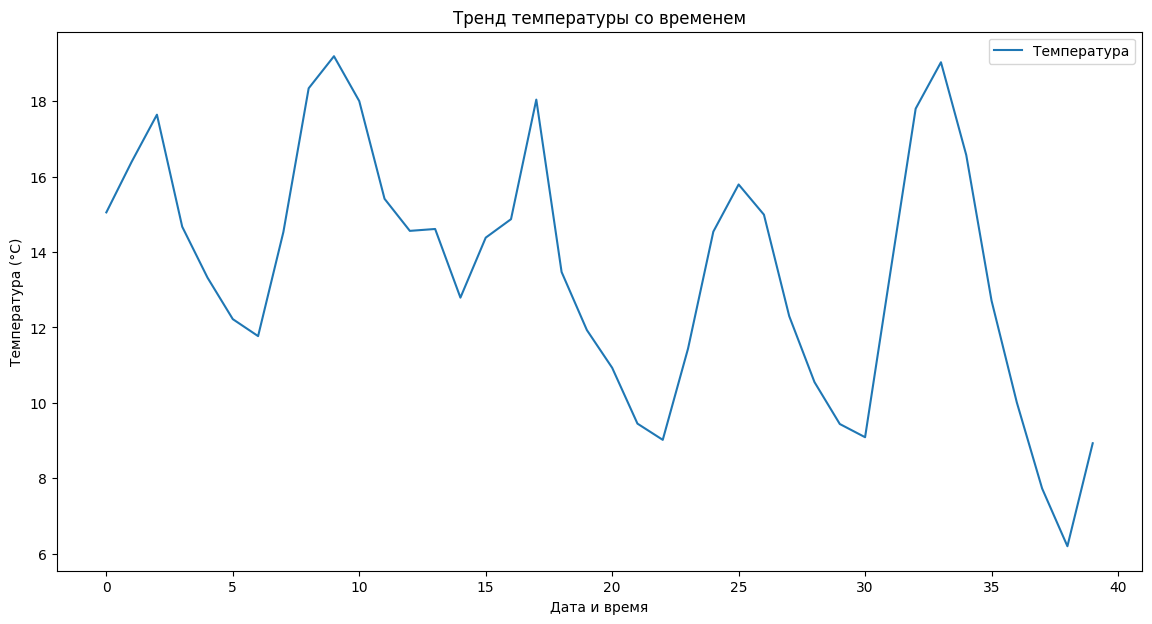

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

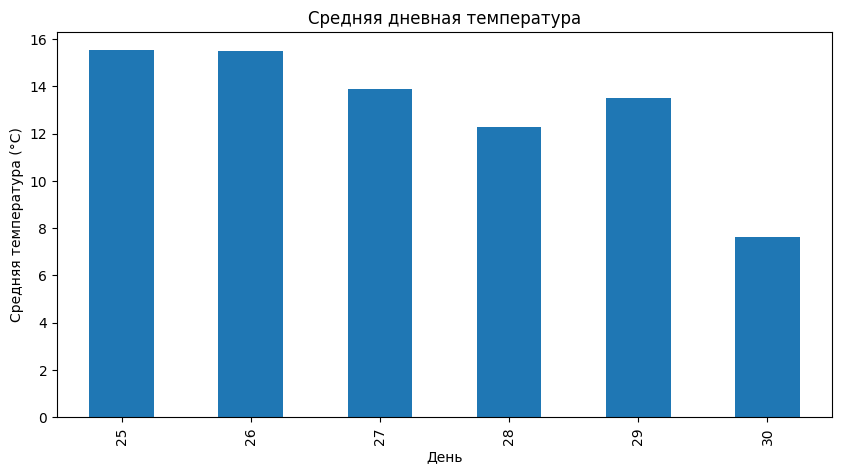

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

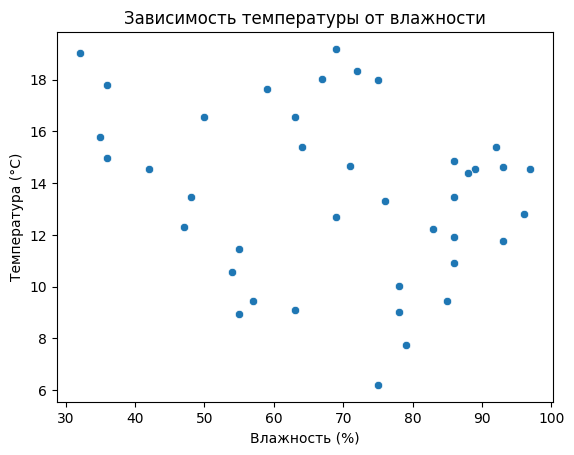

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

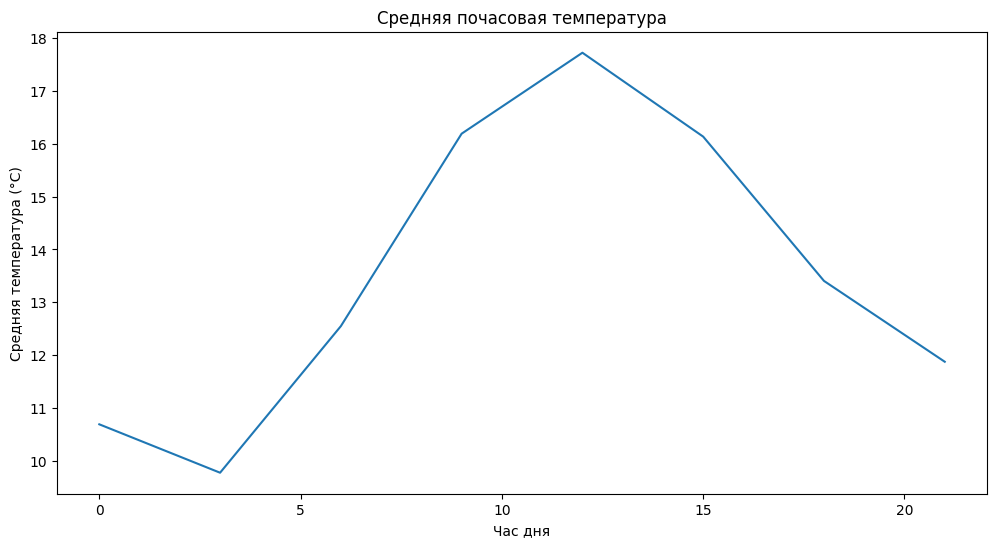

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

Выведите оценку точности:

### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

Выведите оценку точности:

### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [ ]:
px.choropleth(
  gapminder, # набор данных
  locations="iso_alpha", # отображение с помощью цвета color
  color="lifeExp", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame="year", # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1c1-_RNTTa2V7H0v7-C1CHtmKYkuVHREg?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм